In [1]:
# Univariate Selection
# Statistical tests can be used to select those features that have the strongest relationship with the output variable.

# The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

# The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
df = pd.read_csv("Combined_dataset_predict_1year.csv").drop(columns="Unnamed: 0") #.drop(columns=["Unnamed: 0", "GAUL", "M49", "Area", "Year"])
#df["Casualties"] = df["Casualties"].fillna(0)
#df["Undernourishment (%)"] = df["Undernourishment (%)"].replace({"<2.5": 0})
#df["Undernourishment (%)"] = pd.to_numeric(df["Undernourishment (%)"])
#df = df.dropna()
df["Undernourishment (%)"] = df["Undernourishment (%)"].apply(lambda x: x*10)
df["Undernourishment (%)"] = df["Undernourishment (%)"].astype(int)

X = df.iloc[:,0:6] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [32]:
df.head()

,GDP (MUSD),GNI (MUSD),Food Prod. Index,Temperature,Precipitation,Casualties,Undernourishment (%)
0,4141.523943,4134.295420,75.74,285.637743,64.661574,1157.0,406
1,4729.042179,4721.728965,77.83,284.996151,74.464959,944.0,380
2,5388.482107,5396.722695,75.77,285.864614,66.059247,817.0,361
3,6220.574147,6231.622214,84.68,284.481630,78.640260,1711.0,333
4,7104.711445,7148.304369,78.42,285.923770,72.733321,4982.0,298


In [33]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)

In [34]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [35]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]

In [36]:
featureScores

,Specs,Score
0,GDP (MUSD),6.841136e+08
1,GNI (MUSD),6.899877e+08
2,Food Prod. Index,2.120637e+03
3,Temperature,2.650925e+02
4,Precipitation,3.010532e+05
5,Casualties,6.465154e+06


In [37]:
print(featureScores.nlargest(6,"Score"))  #print 10 best features

              Specs         Score
1        GNI (MUSD)  6.899877e+08
0        GDP (MUSD)  6.841136e+08
5        Casualties  6.465154e+06
4     Precipitation  3.010532e+05
2  Food Prod. Index  2.120637e+03
3       Temperature  2.650925e+02


In [38]:
# Feature Importance
# You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

# Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

# Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [40]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.17642824 0.17747711 0.15921559 0.23667318 0.18100551 0.06920036]


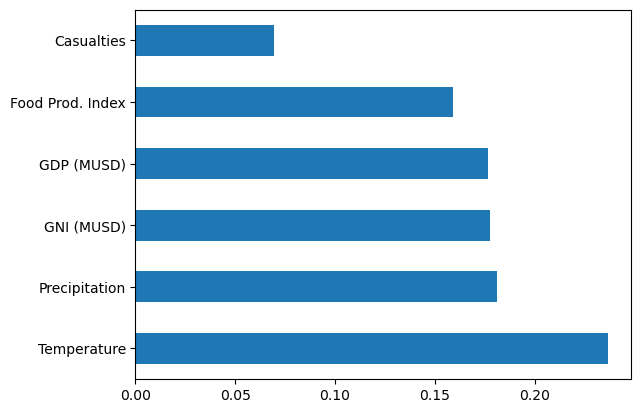

In [41]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [14]:
# Correlation Matrix with Heatmap
# Correlation states how the features are related to each other or the target variable.

# Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

# Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

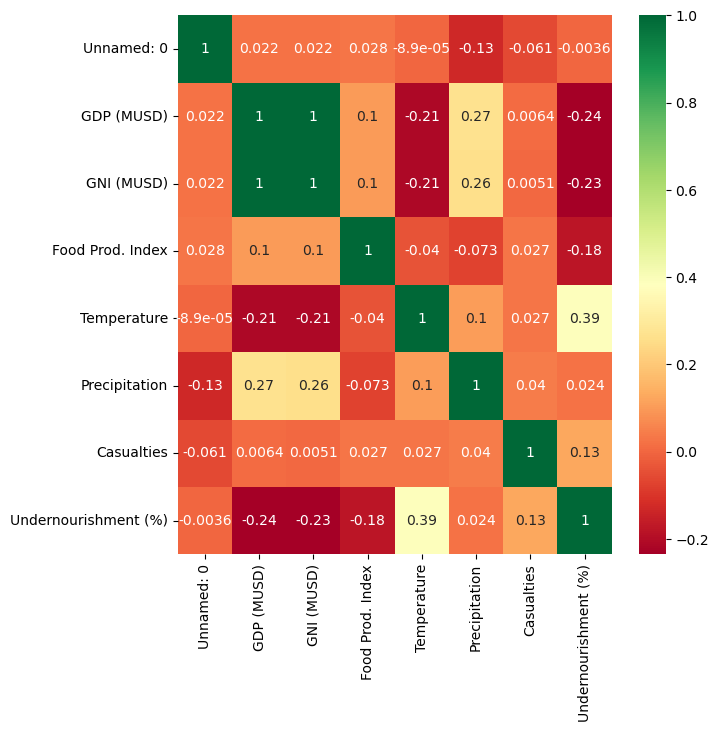

In [21]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")